## Word Vectors

This assignment is comprised of three parts:

1. **Theory**: Prove simple properties of cosine similarity. Prove that using sums of word vectors as phrase embeddings is problematic.
2. **Implementation**: You will  experiment with sparse and dense vector representations of words.
3. **Classification**: You will use LLM embeddings or moving reviews to train a sentiment analyzer.

Word Vectors are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses. Here, you will explore two types of word vectors:

- those derived from *co-occurrence matrices*, and 

- those derived via *word2vec*. 

**Note on Terminology:** The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding) states, "*conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension*".

Before getting started with the implementation, install the gensim library:

```sh
pip install --upgrade gensim
```

## Sean Devlin


# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a .pdf version showing the code and the output of all cells, and save it in the same folder that contains the notebook file .ipynb.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing we will see when grading!
7. Submit **both** your PDF and notebook on Canvas. **Do not submit the data folder!**
8. Verify your Canvas submission contains the correct files by downloading them after posting them on Canvas.

# Theory

## Properties of cosine similarity (20p)

1. Prove that doubling the length of a vector $\mathbf{u}$ does not change its cosine similarity with any other vector $\mathbf{v}$, i.e. prove that $cos(2\mathbf{u}, \mathbf{v}) = cos(\mathbf{u}, \mathbf{v})$.
2. Could the cosine similarity be negative when using *tf.idf* vector representations? Explain your answer.
3. Could the cosine similarity be negative when using prediction-based, dense vector representations? Explain your answer.


It is important that math is formatted appropriately, e.g. $x_i$ looks good, xi looks bad.

### <font color="blue">Solution 1 goes here.</font>


\begin{aligned}
    \cos(u, v) &= {u \cdot v \over \lVert u \rVert \lVert v \rVert} \\\\
    \cos(2 u, v) &= {(2 u) \cdot v \over \lVert 2 u \rVert \lVert v \rVert} \\\\
    \cos(2 u, v) &= {2 ( u \cdot v ) \over 2 \lVert  u \rVert \lVert v \rVert} \\\\
    \cos(2 u, v) &= {u \cdot v \over \lVert u \rVert \lVert v \rVert} \\\\
    \cos(2 u, v) &= \cos(u, v)
\end{aligned}


### <font color="blue">Solution 2 goes here.</font>

No. Both TF and IDF are based on counts of words, which cannot be negative. Since the vectors are made up of entirely positive numbers, they must fall in the same quadrant, and thus cannot be more than 90 degrees separate, corresponding to a dot product of 0. Therefore, the cosine similarity must be greater than or equal to 0.

### <font color="blue">Solution 3 goes here.</font>

Yes. Learned embeddings can contain negative numbers, which means they can point in any direction.

## Phrase embeddings (20p)

Given a phrase consisting of a sequence of M words, $phrase = [word_1, word_2, ..., word_M]$, and given that we have already trained word embeddings $E(word)$ for all the words $word \in V$ in the vocabulary, a simple way of creating an embedding for the phrase is by summing up the embeddings of its words:
\begin{equation}
  E(phrase) = \sum_{m = 1}^M E(word_m)
\end{equation}
Considering an entire movie review to be a very long phrase, we could then train a binary logistic regression model with parameters $\mathbf{w}$ and $b$ for sentiment classification. In that case, the larger the logit score $z(phrase) = \mathbf{w}^T E(phrase) + b$, the higher the probability the model assigns to the positive sentiment for this $phrase$. Prove that in this approach, irrespective of the model parameters, the inequalities below cannot both hold:
\begin{aligned}
  z(good) & > & z(not \; good) \\
  z(bad) & < & z(not \; bad)
\end{aligned}

### <font color="blue">YOUR SOLUTION goes here.</font>

First, we expand the equation for z(not good)
\begin{aligned}
    E(not \; good) &= E(not) + E(good) \\\\
    z(not \; good) &= w^T \big(E(not) + E(good)\big) + b \\\\
    z(not \; good) &= w^T E(not) + w^T E(good) + b
\end{aligned}

Then, compare it to z(good)

\begin{aligned}
    w^T E(good) + b &> w^T E(not) + w^T E(good) + b \\\\
    \cancel{w^T E(good) + b} &> w^T E(not) + \cancel{w^T E(good) + b} \\\\
    w^T E(not) &< 0
\end{aligned}

If we repeat the process for the second inequality:

\begin{aligned}
    w^T E(bad) + b &< w^T E(not) + w^T E(bad) + b \\\\
    \cancel{w^T E(bad) + b} &< w^T E(not) + \cancel{w^T E(bad) + b} \\\\
    w^T E(not) &> 0
\end{aligned}

It is clear that $\mathbf{w}^T E(not)$ cannot be both greater than 0 and less than 0 at the same time, so the inequalities cannot hold

## Time and memory complexity (bonus 20p)

1. Describe an **efficient** procedure (pseudocode) for computing the *tf.idf* vectors for all the words in a vocabulary $V$, given a set of documents $D$ that contain a total of $N$ word occurrences, and a context window of size $C$. Compute its time and memory complexity, as a function of the size of $V$, $D$, $N$, and $C$.
2. What are the time and memory complexity of the skip-gram word2vec model described in class for learning dense word embeddings? Assume the vocabulary is $V$, the corpus is a sequence of words of length $N$, the context window contains $C$ words, and that for every context word we sample $K$ negative words. Assume a gradient descent update is made for each center (target) word, and that the algorithm runs $E$ passes over the entire corpus.

### <font color="blue">YOUR SOLUTION goes here.</font>



# Implementation

In [76]:
# All required import statements are here.
from collections import defaultdict, Counter
import math
import operator
import gzip

import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD

import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

np.random.seed(0)
random.seed(0)

## Part 1: Count-Based Word Vectors

Most word vector models start from the following idea:

*You shall know a word by the company it keeps ([Firth, J. R. 1957:11](https://en.wikipedia.org/wiki/John_Rupert_Firth))*

Many word vector implementations are driven by the idea that similar words, i.e., (near) synonyms, will be used in similar contexts. As a result, similar words will often be spoken or written along with a shared subset of words, i.e., contexts. By examining these contexts, we can try to develop embeddings for our words. With this intuition in mind, many "old school" approaches to constructing word vectors relied on word counts.

This part explores distributional similiarity in a dataset of 10,000 Wikipedia articles (4.4M words), building high-dimensional, sparse representations for words from the distinct contexts they appear in.  These representations allow for analysis of the most similar words to a given query.

In [77]:
# We will use as context 4 words to the left and 4 words to the right.
window = 4

# We will only consider as context the most common 10,000 words in the vocabulary.
vocabSize = 10000

### Question 1.1: Load corpus and create document frequency  dictionary (10p)

Load the data from the Wikipedia file. Each line contains a Wikipedia document. After running this code, `wiki_data` should contain a list of all lowercased tokens in the corpus that contain only letters, whereas `dfs` should be a dictionary that maps each unique token to the number of Wikipedia documents in which the token appears (i.e. its document frequency).

In [78]:
filename = "../data/wiki.10K.txt"

dfs = defaultdict(int)
Ndocs = 0
wiki_data = []
with open(filename, 'r', encoding = "utf-8") as fwiki:
    for line in fwiki:
        tokens = [t for t in line.lower().split() if t.isalpha()]
        # YOUR CODE HERE
        Ndocs += 1
        visited_list = []
        for token in tokens:
            wiki_data.append(token)
            if token not in visited_list:
                dfs[token] += 1
                visited_list.append(token)




print('Total number of documents:', Ndocs)
print(len(wiki_data))

Total number of documents: 10000
3596749


In [79]:
# Let's print the 20 tokens with the largest document frequency.
top = sorted(dfs.items(), key = lambda item: item[1], reverse = True)
print(top[:20])

[('the', 9578), ('in', 9274), ('a', 9160), ('of', 8772), ('is', 8221), ('and', 8106), ('was', 6893), ('to', 6802), ('as', 5853), ('by', 5835), ('on', 5821), ('for', 5794), ('with', 5419), ('at', 5315), ('from', 5289), ('it', 5079), ('an', 4966), ('that', 4014), ('also', 3880), ('which', 3715)]


#### Create empty word representations

For each of the `vocabSize` most common words in the `data`, create a word representation that is initialized to an empty dictionary. Return the `word_representations` as a dictionary mapping each word to its empty word representation.

In [80]:
def create_representations(data, vocabSize):
    word_representations = {}
    vocab = Counter()
    for i, word in enumerate(data):
        vocab[word] += 1

    topK = [k for k,v in vocab.most_common(vocabSize)]
    for k in topK:
        word_representations[k] = defaultdict(float)
    return word_representations

In [81]:
word_representations = create_representations(wiki_data, vocabSize)

In [82]:
print(word_representations['falcon'])

defaultdict(<class 'float'>, {})


#### Update word representations

Traverse the `data` from left to right, and for each word occurrence update its word representation by incrementing the counts for words appearing `window` words to the left and `window` words to the right.

In [83]:
def update_representations(data, word_representations, window):
    for i, word in enumerate(data):
        if word not in word_representations:
            continue
        start = i - window if i - window > 0 else 0
        end = i + window + 1 if i + window + 1 < len(data) else len(data)
        for j in range(start, end):
            if i != j:
                word_representations[word][data[j]] += 1

In [84]:
update_representations(wiki_data, word_representations, window)

In [85]:
print(word_representations['falcon'])

defaultdict(<class 'float'>, {'is': 7.0, 'the': 89.0, 'florida': 1.0, 'college': 1.0, 'school': 1.0, 'has': 6.0, 'a': 22.0, 'addition': 1.0, 'angara': 1.0, 'full': 4.0, 'thrust': 4.0, 'falcon': 22.0, 'heavy': 20.0, 'and': 35.0, 'long': 2.0, 'of': 28.0, 'chinese': 1.0, 'at': 3.0, 'cambridge': 2.0, 'tabernacle': 4.0, 'also': 1.0, 'known': 3.0, 'as': 6.0, 'holiness': 2.0, 'church': 2.0, 'building': 1.0, 'in': 26.0, 'north': 1.0, 'carolina': 1.0, 'built': 1.0, 'was': 11.0, 'founder': 1.0, 'chose': 1.0, 'octagon': 1.0, 'shape': 1.0, 'home': 1.0, 'pentecostal': 1.0, 'since': 2.0, 'developed': 3.0, 'launch': 11.0, 'vehicle': 8.0, 'family': 3.0, 'rocket': 16.0, 'to': 16.0, 'reach': 1.0, 'orbit': 6.0, 'first': 8.0, 'private': 1.0, 'for': 16.0, 'an': 4.0, 'orbital': 2.0, 'reuse': 1.0, 'around': 1.0, 'sun': 1.0, 'payload': 3.0, 'december': 2.0, 'flown': 2.0, 'back': 1.0, 'acronym': 1.0, 'big': 1.0, 'spacex': 10.0, 'revealed': 1.0, 'on': 12.0, 'demonstrator': 1.0, 'booster': 6.0, 'return': 1.0, 't

#### Normalize word representations

Currently, `word_representations` is a dictionary that maps words to their representation, where each representation is itself a dictionary mapping a words to counts. This dictionary can be seen as a sparse vector representation, where each position in the vector corresponds to a word in the vocabulary. Since most words woudl have a co-occurrence count of 0, the dictionary only stores words for whic the counts are greater than 0.

In the function below, we normalize each word representation such that its norm is 1. This is done by first computing the norm of the representation, and then dividing each count in the vector by the norm. We do this normalization such that dot-product between normalzied vectors is equivalent with cosine similarity.

In [86]:
def normalize(word_representations):
    for word in word_representations:
        total = 0
        for key in word_representations[word]:
            total += word_representations[word][key] * word_representations[word][key]
            
        total = math.sqrt(total)
        for key in word_representations[word]:
            word_representations[word][key] /= total    

In [87]:
normalize(word_representations)

In [88]:
print(word_representations['falcon'])

defaultdict(<class 'float'>, {'is': 0.057774342570041805, 'the': 0.7345594983905316, 'florida': 0.008253477510005972, 'college': 0.008253477510005972, 'school': 0.008253477510005972, 'has': 0.049520865060035835, 'a': 0.18157650522013138, 'addition': 0.008253477510005972, 'angara': 0.008253477510005972, 'full': 0.03301391004002389, 'thrust': 0.03301391004002389, 'falcon': 0.18157650522013138, 'heavy': 0.16506955020011946, 'and': 0.288871712850209, 'long': 0.016506955020011944, 'of': 0.23109737028016722, 'chinese': 0.008253477510005972, 'at': 0.024760432530017917, 'cambridge': 0.016506955020011944, 'tabernacle': 0.03301391004002389, 'also': 0.008253477510005972, 'known': 0.024760432530017917, 'as': 0.049520865060035835, 'holiness': 0.016506955020011944, 'church': 0.016506955020011944, 'building': 0.008253477510005972, 'in': 0.21459041526015527, 'north': 0.008253477510005972, 'carolina': 0.008253477510005972, 'built': 0.008253477510005972, 'was': 0.09078825261006569, 'founder': 0.00825347

### Question 1.2: Cosine Similarity (10p)

Write a function `dictionary_dot_product(dict1, dict2)` that computes the dot-product between the two normalized word representations stored as dictionaries.

In [89]:
def dictionary_dot_product(dict1: defaultdict, dict2: defaultdict):
    dot = 0
    # YOUR CODE HERE
    matching_words = [t for t in dict1.keys() if t in dict2.keys()]
    for word in matching_words:
        dot += dict1[word] * dict2[word]

    
    
    return dot

In [90]:
print(dictionary_dot_product(word_representations['falcon'], word_representations['bird']))
print(dictionary_dot_product(word_representations['falcon'], word_representations['bridge']))

0.8033426501314231
0.8676598940924938


#### Nearest Neighbors

Write a function `find_nearest_neighbors(word_representations, query, K)` that takes as input a query word and returns the K most similar words.

We first define a helper function `compute_sim(word_representations, query)` that takes as input a query word and computes, for each word in the vocabulary, the cosine similarity between the representation of that word and the representation of the query word.

In [91]:
def compute_sim(word_representations, query):
    if query not in word_representations:
        print("'%s' is not in vocabulary" % query)
        return None
    
    scores = {}
    for word in word_representations:
        cosine = dictionary_dot_product(word_representations[query], word_representations[word])
        scores[word] = cosine
    return scores

In [92]:
# Find the K words with highest cosine similarity to a query in a set of word_representations
def find_nearest_neighbors(word_representations, query, K):
    scores = compute_sim(word_representations, query)
    if scores != None:
        sorted_x = sorted(scores.items(), key = operator.itemgetter(1), reverse = True)
        for idx, (k, v) in enumerate(sorted_x[:K]):
            print("%s\t%s\t%.5f" % (idx, k, v))

In [93]:
find_nearest_neighbors(word_representations, "falcon", 10)

0	falcon	1.00000
1	for	0.89689
2	in	0.89653
3	stage	0.89525
4	french	0.89523
5	market	0.89459
6	vehicle	0.89446
7	design	0.89382
8	program	0.89374
9	on	0.89369


In [94]:
find_nearest_neighbors(word_representations, "musician", 10)

0	musician	1.00000
1	writer	0.91968
2	journalist	0.89769
3	photographer	0.89593
4	pianist	0.89561
5	businessman	0.89480
6	poet	0.88196
7	politician	0.88074
8	entrepreneur	0.87987
9	composer	0.87770


### Question 1.2: Implement Tf.Idf Representation (10p)

Q1: Fill out a function `tfidf` below.  This function takes as input a dict of word_representations and for each context word in `word_representations[word]` replaces its *count* value with its tf-idf score.  Use $\log{(count + 1)}$ for tf and $\log{N \over df}$ for idf. This function should modify `word_representations` in place.

In [95]:
def tfidf(word_representations):
    for word in word_representations:
        for key in word_representations[word]:
            # YOUR CODE HERE
            tf = math.log(word_representations[word][key] + 1)
            idf = math.log(10000 / dfs[key])
            word_representations[word][key] = tf * idf




In [96]:
tf_idf_word_representations = create_representations(wiki_data, vocabSize)
update_representations(wiki_data, tf_idf_word_representations, window)
tfidf(tf_idf_word_representations)
normalize(tf_idf_word_representations)

### Question 1.3: Compare Count Representations with Tf.Idf Representations (10p)

How does the tf.idf representation change the the nearest neighbors? Use `find_nearest_neighbors` on some of the words below.

In [97]:
query = ["falcon", "doctor", "germany"] # "musician" student" "education" "bacteria" "beer" "brook" "greedy" "carbon" "prisoner" "river" "mountain" "germany" "child" "computer" "actor" "science"
for word in query:
    print(f"Nearest neighbors for {word}")
    find_nearest_neighbors(word_representations, word, 10)
    print()
    print(f"Nearest tf-idf for {word}")
    find_nearest_neighbors(tf_idf_word_representations, word, 10)

Nearest neighbors for falcon
0	falcon	1.00000
1	for	0.89689
2	in	0.89653
3	stage	0.89525
4	french	0.89523
5	market	0.89459
6	vehicle	0.89446
7	design	0.89382
8	program	0.89374
9	on	0.89369

Nearest tf-idf for falcon
0	falcon	1.00000
1	spacex	0.38249
2	rocket	0.33439
3	launch	0.31391
4	spacecraft	0.26914
5	launches	0.26821
6	orbital	0.24885
7	orbit	0.22607
8	dragon	0.20700
9	musk	0.19768
Nearest neighbors for doctor
0	doctor	1.00000
1	man	0.93266
2	full	0.93243
3	student	0.92990
4	child	0.92970
5	figure	0.92948
6	with	0.92917
7	young	0.92848
8	piece	0.92140
9	study	0.91981

Nearest tf-idf for doctor
0	doctor	1.00000
1	octopus	0.32138
2	doctorate	0.17523
3	him	0.16711
4	she	0.16549
5	he	0.16343
6	degree	0.16194
7	his	0.15873
8	her	0.15418
9	who	0.15280
Nearest neighbors for germany
0	germany	1.00000
1	france	0.97900
2	italy	0.97738
3	england	0.97155
4	london	0.96931
5	japan	0.96740
6	spain	0.96444
7	rome	0.96410
8	europe	0.96362
9	canada	0.96259

Nearest tf-idf for germany
0	germany	1.00

### <font color="blue">YOUR ANSWER goes here.</font>

Falcon - The neighbors without tf-idf seem almost meaningless; almost none of them have anything to do with birds or animals. Once you see the tf-idf embeddings, it becomes clear that this is because of the Falcon-9 rocket overpowering any mention of falcon as an animal. The tf-idf embeddings are definitely more useful in this case.

Doctor - I tried doctor to see if it revealed any bias in the data. Without tf-idf, the top nearest neighbor was "man", with several somewhat unrelated words following. With tf-idf, the neighbors included "him" and "his", but also "she" and "her", with very comparable scores to the masculine words. 

Germany - In this case, the neighbors without tf-idf seemed to be better, as it was mostly a list of countries (likely because of the amount of country-based list on wikipedia). The tf-idf neighbors had several countries, but also words like "had" and "would", which do not tell us much about the word "germany".

## Part 2: Prediction-Based Word Vectors

As discussed in class, prediction-based dense word embeddings have come to dominate NLP. Here, we shall explore the embeddings produced by 'word2vec'. Please revisit the class notes and lecture slides for more details on the word2vec algorithm. If you're feeling adventurous, challenge yourself and try reading the [original paper](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf).

Then run the following cells to load the word2vec vectors into memory. **Note**: This might take several minutes.

In [98]:
from gensim.models import KeyedVectors

wv_from_bin = KeyedVectors.load_word2vec_format('../data/word2vec-google-news-300.gz', binary = True)
vocab = list(wv_from_bin.key_to_index.keys())
print("Loaded vocab size %i" % len(vocab))

Loaded vocab size 3000000


### Question 2.1: Compare Word2Vec Embeddings with Co-occurrence Embeddings (10p)

Let's use the word2vec embeddings to find the most similar words, usign the same targets as in part 1 above. Compare the quality of the top 10 words using word2vec with the top 10 most similar words from part 1 above. Which method is better?

In [99]:
wv_from_bin.most_similar("falcon") # "brook", "musician" student" beer" education" "bacteria" "brook" "greedy" "carbon" "prisoner" "river" "mountain" "germany" "child" "computer" "actor" "science"

[('falcons', 0.7347280383110046),
 ('Peregrine_falcon', 0.6738407015800476),
 ('peregrine_falcon', 0.6711037158966064),
 ('bird', 0.6649249196052551),
 ('peregrine', 0.6440845131874084),
 ('owl', 0.640914261341095),
 ('Peregrine_Falcon', 0.6378713250160217),
 ('golden_eagle', 0.6336444616317749),
 ('raptor', 0.6276084780693054),
 ('gyrfalcon', 0.6154173612594604)]

### <font color="blue">YOUR ANSWER goes here.</font>

Falcon - The word2vec embeddings were perhaps more "accurate", with most of the words being related to falcons as birds and not rockets, but it also included "Peregine_Falcon" three separate times with different capitalization. 

Doctor - Word2vec performed much better than tf-idf on this word, with all of its neighbors being titles for medical professionals. 

Germany - "germany" with a lowercase g gave a list of european countries, but "Germany" strangely returned "Germnay", "symbol_RSTI", "Annita_Kirsten", who was apparently a German tourist who died in a skydiving accident in 2010.

I would say that word2vec is probably more useful overall, but also seems to give some very strange output for certain words. 

### Reducing dimensionality of Word2Vec Word Embeddings

1. Put the 3 million word2vec vectors into a matrix M
2. Run reduce_to_k_dim (your Truncated SVD function) to reduce the vectors from 300-dimensional to 2-dimensional.

Here, we construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings. We use SVD to take the top k components and produce a new matrix of k-dimensional embeddings. 

**Note:** All of numpy, scipy, and scikit-learn (`sklearn`) provide *some* implementation of SVD, but only scipy and sklearn provide an implementation of Truncated SVD, and only sklearn provides an efficient randomized algorithm for calculating large-scale Truncated SVD. So please use [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

In [100]:
def reduce_to_k_dim(M, k = 2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of corpus words, number of corpus words)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    svd = TruncatedSVD(n_components = k, n_iter = n_iters, random_state=42)
    svd.fit(M)
    M_reduced = M @ svd.components_.T
    # ------------------

    print("Done.")
    
    return M_reduced

In [101]:
def get_matrix_of_vectors(wv_from_bin, required_words = []):
    """ Put the word2vec vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 3 million word2vec vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 300) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.index_to_key)
    print("Shuffling words ...")
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words))
    word2Ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2Ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2Ind

### Question 2.2: Word2Vec Plot Analysis (10p)

Here we write a function to plot a set of 2D vectors in 2D space. For graphs, we will use Matplotlib (`plt`).

In [102]:
def plot_embeddings(M_reduced, word2Ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2Ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , k)): matrix of k-dimensional word embeddings
            word2Ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    # ------------------
    xvals = []
    yvals = []
    for word in words:
        embed2D = M_reduced[word2Ind[word]]
        xvals.append(embed2D[0])
        yvals.append(embed2D[1])
        
    fig, ax = plt.subplots()
    ax.scatter(xvals, yvals)
    
    for i, word in enumerate(words):
        ax.annotate(word, (xvals[i], yvals[i]))
    # ------------------

Run the cell below to plot the 2D word2vec embeddings for `['music', 'jazz', 'opera', 'paris', 'berlin', 'tokyo', 'queen', 'king', 'prince', 'volcano', 'chemistry', 'biology', 'physics', 'lava', 'sonata']`.

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you might think should have?

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.
Running Truncated SVD over 10015 words...
Done.


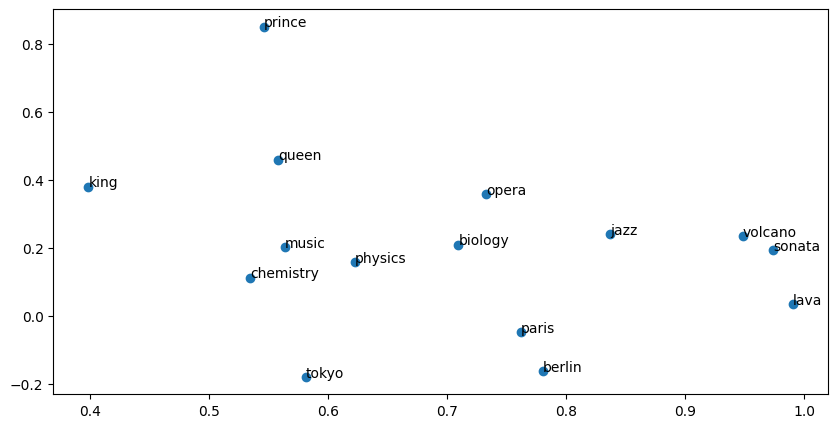

In [103]:
# -----------------------------------------------------------------
# Run this code to Reduce 300-Dimensional Word Embeddings to k Dimensions
# Note: This may take several minutes
# -----------------------------------------------------------------
words = ['music', 'jazz', 'opera', 'paris', 'berlin', 'tokyo', 'queen', 'king', 'prince', 'volcano', 'chemistry', 'biology', 'physics', 'lava', 'sonata']
M, word2Ind = get_matrix_of_vectors(wv_from_bin, required_words = words)
M_reduced = reduce_to_k_dim(M, k = 2)

plot_embeddings(M_reduced, word2Ind, words)

### <font color="blue">YOUR ANSWER goes here.</font>

The clusters seem to be pretty well defined. "king", "prince", and "queen" all stick to the upper left, and the locations all land in the bottom. The only odd part is that "music" is closer to "chemistry" and "physics" than it is to the music genres, but that is likely due to it's status as a school subject/major. Also, "sonata" is closest to "volcano", which doesn't make much sense in this low dimensional space.

### Cosine Similarity
Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

We can think of n-dimensional vectors as points in n-dimensional space. If we take this perspective L1 and L2 Distances help quantify the amount of space "we must travel" to get between these two points. Another approach is to examine the angle between two vectors. From trigonometry we know that:

<img src="imgs/inner_product.png" width=20% style="float: center;"></img>

Instead of computing the actual angle, we can leave the similarity in terms of $similarity = cos(\Theta)$. Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

### Question 2.3: Polysemous Words [code + written] (10p)

Find a [polysemous](https://en.wikipedia.org/wiki/Polysemy) word (for example, "leaves" or "scoop") such that the top-10 most similar words (according to cosine similarity) contains related words from *both* meanings. For example, "leaves" has both "vanishes" and "stalks" in the top 10, and "scoop" has both "handed_waffle_cone" and "lowdown". You will probably need to try several polysemous words before you find one. Please state the polysemous word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous words you tried didn't work?

**Note**: You should use the `wv_from_bin.most_similar(word)` function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance please check the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html)__.

In [104]:
# ------------------
# Write your polysemous word exploration code here.

wv_from_bin.most_similar("bat")
wv_from_bin.most_similar("plant")
wv_from_bin.most_similar("bow")
# ------------------

[('bows', 0.7369688153266907),
 ('Utopias_Calagione', 0.5826424956321716),
 ('Carey_Mulligan_Chloe_Sevigny', 0.5241559147834778),
 ('stern_thrusters', 0.5120289325714111),
 ('bowing', 0.48975077271461487),
 ('Size_Bows', 0.4601086378097534),
 ('bowed', 0.45847630500793457),
 ('nocked', 0.4552280306816101),
 ('ribbons_holly_wreaths', 0.44553202390670776),
 ('bowstring', 0.43764111399650574)]

### <font color="blue">YOUR ANSWER goes here.</font>

Bat - Most of the similar words were related to baseball, but #6 was "Hawaiian_hoary", which refers to the animal bat. I was a little confused as to why it found such an obscure type of bat, instead of something like "vampire bat" or "fruit bat", but "vampire" and "fruit" both have very frequently used other contexts that might make them less similar to the word "bat".

Plant - I only got factory related words here.

Bow - I got several different meanings here: "bowstring" and "nocked" referring to bow as a weapon, "stern_thrusters" referring to the bow of a ship, "bowing" and "bowed" referring bow as a synonym to bend, and "ribbons_holly_wreaths" referring to bow as a decoration. 

To be honest, most of the words I tried had at least some other meaning in the top 10. The reason another meaning might not appear is that the other meaning is used in a much broader context than the meaning that appeared, so the other similar vectors are more spread out. For example, the living "plant" can refer to an object or a verb, which is often used as a metaphor such as "planting an idea" or "planting evidence". By contrast, the factory "plant" has a much more constrained usage, which is why it might end up being more similar to the original vector.

### Question 2.4: Synonyms & Antonyms (10p)

When considering Cosine Similarity, it's often more convenient to think of Cosine Distance, which is simply 1 - Cosine Similarity.

Find three words (w1,w2,w3) where w1 and w2 are synonyms and w1 and w3 are antonyms, but Cosine Distance(w1,w3) < Cosine Distance(w1,w2). For example, w1 = "happy" is closer to w3 = "sad" than to w2 = "cheerful". 

Once you have found your example, please give a possible explanation for why this counter-intuitive result may have happened.

You should use the the `wv_from_bin.distance(w1, w2)` function here in order to compute the cosine distance between two words. Please see the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html)__ for further assistance.

In [105]:
# ------------------
# Write your synonym & antonym exploration code here.

w1 = "smart"
w2 = "genius"
w3 = "dumb"
w1_w2_dist = wv_from_bin.distance(w1, w2)
w1_w3_dist = wv_from_bin.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

# ------------------

Synonyms smart, genius have cosine distance: 0.6618955135345459
Antonyms smart, dumb have cosine distance: 0.42073047161102295


### <font color="blue">YOUR ANSWER goes here.</font>

My words were "smart", "genius", and "dumb". I believe this happened because "genius" can be used as an adjective like "smart", but it can also be used as a noun to refer to a person. "smart" and "dumb" are both only ever adjectives, so it makes sense why they might be closer to each other.

### Solving Analogies with Word Vectors
Word2Vec vectors have been shown to *sometimes* exhibit the ability to solve analogies. 

As an example, for the analogy "man : king :: woman : x", what is x?

In the cell below, we show you how to use word vectors to find x. The `most_similar` function finds words that are most similar to the words in the `positive` list and most dissimilar from the words in the `negative` list. The answer to the analogy will be the word ranked most similar (largest numerical value).

**Note:** Further Documentation on the `most_similar` function can be found within the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html)__.

In [106]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]


### Question 2.5: Finding Analogies (10p)

Find 5 examples of analogies that holds according to these vectors (i.e. the intended word is ranked top). In your solution please state the full analogy in the form x:y :: a:b. If you believe the analogy is complicated, explain why the analogy holds in one or two sentences. 

**Note**: You may have to try many analogies to find ones that work!

Document also 5 examples of analogies that do not hold according to the learned word vectors.

In [107]:
# ------------------
# Write your analogy exploration code here.
pprint.pprint(wv_from_bin.most_similar(positive=['pilot', 'car'], negative=['driver']))

# pprint.pprint(wv_from_bin.most_similar(positive=['grape', 'tree'], negative=['apple']))
# pprint.pprint(wv_from_bin.most_similar(positive=['car', 'furniture'], negative=['chair']))
# pprint.pprint(wv_from_bin.most_similar(positive=['hat', 'foot'], negative=['shoe']))
# pprint.pprint(wv_from_bin.most_similar(positive=['head', 'shoe'], negative=['foot']))
# pprint.pprint(wv_from_bin.most_similar(positive=['chef', 'music'], negative=['musician']))

# ------------------

[('airplane', 0.5748612284660339),
 ('plane', 0.5427115559577942),
 ('relaxed_el_Amruni', 0.5299280285835266),
 ('aircraft', 0.5057506561279297),
 ('jet', 0.48268795013427734),
 ('copter', 0.47771763801574707),
 ('Cessna_###R', 0.476409375667572),
 ('glider', 0.47608375549316406),
 ('V._Chiodo', 0.4744521379470825),
 ('twin_engined_Cessna', 0.4730333685874939)]


### <font color="blue">YOUR ANSWER goes here.</font>

##### Working analogy: #####
driver:car :: pilot:x --> "airplane" was the first answer

##### Failed analogies: ######

apple:tree :: grape:x  --> "vines" was the third answer

chair:furniture :: car:x  --> "automobile" was the second answer

shoe:foot :: hat:x  --> "head" was the fourth answer

foot:shoe :: head: x  --> "hat" did not appear in the list

musician:music :: chef:x --> "cuisine" was the first answer, which is close but does not quite work




### Question 2.6: Guided Analysis of Bias in Word Vectors (10p)

It's important to be cognizant of the biases (gender, race, sexual orientation etc.) implicit to our word embeddings.

Run the cell below, to examine (a) which terms are most similar to "woman" and "boss" and most dissimilar to "man", and (b) which terms are most similar to "man" and "boss" and most dissimilar to "woman". What do you find in the top 10?

In [108]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'boss'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'boss'], negative=['woman']))

[('bosses', 0.5522644519805908),
 ('manageress', 0.49151360988616943),
 ('exec', 0.45940810441970825),
 ('Manageress', 0.4559843838214874),
 ('receptionist', 0.4474116563796997),
 ('Jane_Danson', 0.44480544328689575),
 ('Fiz_Jennie_McAlpine', 0.4427576959133148),
 ('Coronation_Street_actress', 0.44275563955307007),
 ('supremo', 0.4409853219985962),
 ('coworker', 0.43986251950263977)]

[('supremo', 0.6097397804260254),
 ('MOTHERWELL_boss', 0.5489562749862671),
 ('CARETAKER_boss', 0.5375303030014038),
 ('Bully_Wee_boss', 0.5333974957466125),
 ('YEOVIL_Town_boss', 0.5321705341339111),
 ('head_honcho', 0.5281980037689209),
 ('manager_Stan_Ternent', 0.525971531867981),
 ('Viv_Busby', 0.5256163477897644),
 ('striker_Gabby_Agbonlahor', 0.525081217288971),
 ('BARNSLEY_boss', 0.5238943099975586)]


### <font color="blue">YOUR ANSWER goes here.</font>

The first comparison revealed some bias, with words like "receptionist" and "manageress" (which I have never heard in my life), but the second comparison was mostly nonsense. Some things made sense, like "head_honcho" and "supremo", but I don't think that proves much because those are male-gendered Spanish words. The other words were totally meaningless, like "MOTHERWELL_boss" and "Viv_Busby".

### Question 2.7: Independent Analysis of Bias in Word Vectors (10p)

Use the `most_similar` function to find at least 2 other cases where some bias is exhibited by the vectors. Please briefly explain the type of bias that you discover.

In [109]:
# ------------------
# Write your bias exploration code here.

pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'doctor'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man','teacher'], negative=['woman']))

# ------------------

[('gynecologist', 0.7093892097473145),
 ('nurse', 0.6477287411689758),
 ('doctors', 0.6471460461616516),
 ('physician', 0.6438996195793152),
 ('pediatrician', 0.6249487996101379),
 ('nurse_practitioner', 0.6218312978744507),
 ('obstetrician', 0.6072014570236206),
 ('ob_gyn', 0.5986713171005249),
 ('midwife', 0.5927062630653381),
 ('dermatologist', 0.5739566683769226)]

[('teachers', 0.5810958743095398),
 ('PE_teacher', 0.5567258596420288),
 ('headmaster', 0.5553571581840515),
 ('Teacher', 0.5439296960830688),
 ('pupil', 0.5400639772415161),
 ('school', 0.5272390246391296),
 ('elementary', 0.5270636081695557),
 ('phys_ed_teacher', 0.5216569304466248),
 ('guidance_counselor', 0.5176147222518921),
 ('tutor', 0.5123642086982727)]


### <font color="blue">YOUR ANSWER goes here.</font>

man:doctor :: woman:x  --> This potentially revealed some bias, with "gynecologist" and "nurse" being the top two answers. However, it is important to note that many of the top responses were doctors that worked specifically with women, such as "gynecologist", "midwife", and "ob_gyn", as opposed to a female equivalent to doctors, so this bias may not be as extreme as it initially seemed.

woman:teacher :: man:x --> "PE_teacher" and "headmaster" appeared towards the top of the list, but most of the other words did not carry much gendered connotation one way or the other. 

### Question 2.8: Thinking About Bias (10p)

What might be the cause of these biases in the word vectors?

### <font color="blue">YOUR ANSWER goes here.</font>

The bias in the vectors comes entirely from the training data. There is nothing about the word2vec algorithm that would explicitly prioritize one group of people over another, but it learns these associations from the bias contained in human-written text.

## Part 3: Sentiment Analysis using LLM Embeddings

In this part of the assignment, you will use an LLM's embeddings API, such as [Gemini Embeddings](https://ai.google.dev/gemini-api/docs/embeddings), to map movie reviews into embeddings, and then use these embeddigns as feature vector to train a sentiment analyzer. Follow the sequence of steps below:

### Data Preprocessing (50 points)

1. Read the training examples from `imdb_sentiment_train.txt`. Store the labels in an array `y_train` and the corresponding movie reviews in the list of strings `x_train`.

2. Pass the list of reviews `x_train` to the Gemini Embeddings API and store the resulting embeddings matrix in a NumPy array `embeddings_train`. Use a size of 512 for the embeddings.

3. Save the `embeddings_train` array in `../data/embeddings.train.npy` using the `numpy.save()` function. Save the labels `y_train` into `../data/labels.train.txt`.

4. Repeat steps 1, 2, and 3 above for the test examples in `imdb_sentiment_test.txt` and create the corresponding `y_test`, `embeddings_test`, and the files `../data/embeddings.test.npy` and `../data/labels.test.txt`.

It is recommended that you split the examples into batches, e.g., each batch containts 100 examples, then provide each batch of examples to the Gemini API, which will return a batch of embeddings. If you use an API key associated with the $300 free credits, this should not incur any rate-limit issues. If you use a generic, free Gemini account, you may want to insert a 10s delay between batches.

For your convenience, if you still encounter issues, we created and saved the Gemini embeddings in the `../data' folder. Nevertheless, submit your code and the output cell you get from it showing any issues you entounter.

In [110]:
import numpy as np
from google import genai


# YOUR CODE HERE
















ModuleNotFoundError: No module named 'google'

### LR Model Training and Testing (50 points)

5. Read the training embeddings from `../data/embeddings.train.npy` into a NumPy array `x_train`, and read the training labels from `../data/labels.train.txt` into `y_train`.

6. Train a binary classifier on `x_train` and `y_train`, using the `sklearn.linear_model.LogisticRegression` class.

7. Read the test embeddings from `../data/embeddings.test.npy` into a NumPy array `x_test`, and read the training labels from `../data/labels.test.txt` into `y_test`.

8. Use the trained classifier to predict the labels of the test embeddings in `x_text` and store the predictions in `pred_test`.

9. Compute and report the test accuracy by comparing the labels in `y_test` and `pred_test`.

10. Compare this accuracy with the accuracy obtained at homework 3.

Our trained logistic regression model obtained **96.4% test accuracy**. 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'lbfgs', max_iter = 1000)

# YOUR CODE HERE













### <font color="blue">Comparison of LR with Embeddings vs. LR with Engineered features.</font>

YOUR ANALYSIS GOES HERE:





## Implementation: Bonus points

Anything extra goes here. For example:

1. (10p) How does changing the window size (smaller, larger) change the word to word similarities?
2. (10p) Even though `count_unigram_context` computes count-based vector representations only for the top K (10000) most common words in the vocabulary, it uses all the words that appear in the context. Change it to only use word in the context that are in the top K most common words, and see if it improves the results.
3. (40p) Use the development examples in `../data/imdb_sentiment_dev.txt` to tune the hyperparameters of the LogisticRegression model, e.g., by usign the K-fold cross-validation function from sklearn. Report how much this improves performance on the test examples.
4. (20p) Tune the embedding size (from 256 to 3072) on the development data and report which one obtains best performance on development, then use it to train and test.